# 8. Modern Convolutional Neural Networks
Not only for vision tasks, also for basic feature generators for more advanced tasks such as tracking, segmentation, object detection, or style transformation.  
While the idea of deep neural networks is quite simple (stack together a bunch of layers), performance can vary wildly across architectures and hyperparameter choices.  
Batch normalization and residual connections described in this chapter have offered two popular ideas for training and designing deep models, both of which have since also been applied to architectures beyond computer vision.  
Following are:
- AlexNet, the first large-scale network deployed to beat conventional computer vision methods on a large-scale vision challenge;  
- VGG network, makes use of a number of repeating blocks of elements;
- the network in network (NiN) that convolves whole neural networks patch-wise over inputs
- the residual network (ResNet), remains one of the most popular off-the-shelf architectures in computer vision
- ResNeXt blocks for sparser connections; 
- DenseNet for a generalization of the residual architecture. 

Special optimizations for efficient networks: coordinate shifts (ShiftNet), semi-automatic design exploration of Radosavovic...


## 8.1. Deep Convolutional Neural Networks (AlexNet)
classical pipelines (rather than training end-to-end, pixel to classification): 
1. obtain an interesting dataset
2. preprocess the dataset with hand-crafted features based on some knowledge of optics, geometry, other analytic tools, and occasionally on the serendipitous discoveries by lucky graduate students.
3. feed the data through a standard set of feature extractors like SIFT, SURF, or any number of other hand-tuned pipelines. 
4. Dump the resulting representations into your favorite classifier, likely a linear model or kernel method, to train a classifier.

### 8.1.1. Representation Learning
The most important part of the pipeline was the representation,  And up until 2012 the representation was calculated mostly mechanically: methods like SIFT, SURF, HOG, bags of visual words, and similar feature extractors.  
Other believe that features ought to be learned.  
The first modern CNN **AlexNet** is largely an evolutionary improvement over LeNet.   
- In the lowest layers of the network, the model learned feature extractors that resembled some traditional filters. 
- Higher layers might build upon these representations to represent larger structures, like eyes, noses. 
- Even higher layers might represent whole objects like people, airplanes. 
- The final hidden state learns a compact representation of the image that summarizes its contents such that data belonging to different categories can be easily separated.


#### 8.1.1.1. Missing Ingredient: Data
Deep models with many layers require large amounts of data in order to enter the regime where they significantly outperform traditional methods based on convex optimizations (e.g., linear and kernel methods).   
the ImageNet dataset challenge researchers to learn models from 1 million examples, 1000 each from 1000 distinct categories of objects. The images were at relatively high resolution of 224*224 pixels, consisting of 32*32 pixel thumbnails.
#### 8.1.1.2. Missing Ingredient: Hardware
Deep learning models are voracious consumers of compute cycles. Training can take hundreds of epochs, and each iteration requires passing data through many layers of computationally expensive linear algebra operations.  
**Graphical processing units** (GPUs) proved to be a game changer in making deep learning feasible.

### 8.1.2. AlexNet
AlexNet employed an 8-layer CNN, showed, for the first time, that the features obtained by learning can transcend manually-designed features, breaking the previous paradigm in computer vision.   
We provide a slightly streamlined version of AlexNet removing some of the design quirks that were needed in 2012 to make the model fit on two small GPUs.
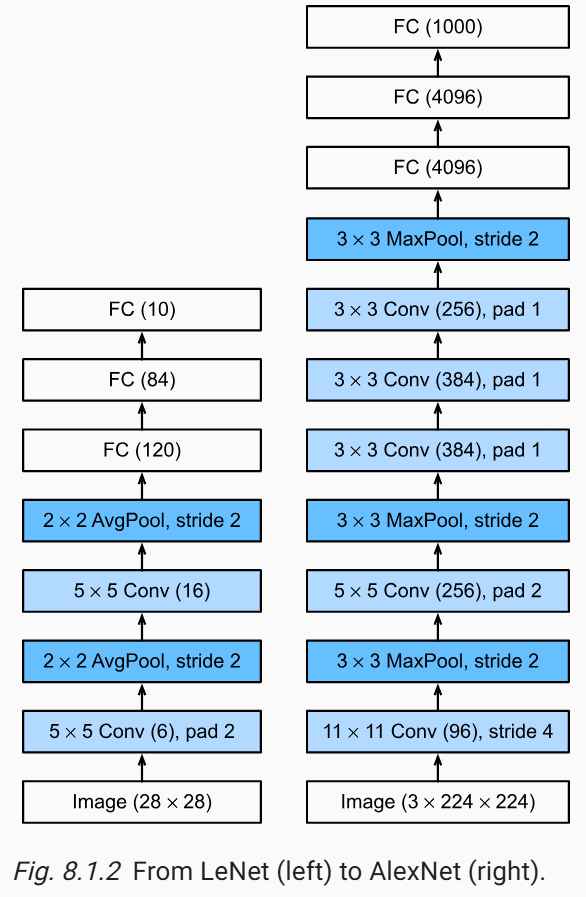

Difference between AlexNet and LeNet: 
- AlexNet is deeper, with 5 convolutional layers, 2 fully connected hidden layers, 1 fully connected output layer.
- AlexNet use ReLU instead of sigmoid as its activation function.
#### 8.1.2.1. Architecture
1. the first convolution layer with window shape = 11*11, 
2. the second convolution layer with window shape = 5*5
3. the third convolution layer with window shape = 3*3
4. max-pooling layer with window shape = 3*3
5. after 1, 2, 5 convolutional layers, add max-pooling layers with window shape = 3*3, stride = 2
6. AlexNet has 10 times more convolution cahnnels than LeNet.
7. After final convolutional layer, there are 2 fc layers with 4096 outputs.

These layers require nearly 1GB model parameters


#### 8.1.2.2. Activation Functions
The computation of the ReLU activation function is simpler (no exponentiation operation like in sigmoid). ReLU also makes model training easier when using different parameter initialization methods (when the output of the sigmoid close to 0 or 1, the gradient is almost 0, so that backpropagation cannot continue to update some of the model parameters. If the model parameters are not properly initialized, the sigmoid function may obtain a gradient of almost 0 ).
#### 8.1.2.3. Capacity Control and Preprocessing
AlexNet controls the model complexity of the fully connected layer by dropout.  
The training loop of AlexNet added a great deal of image augmentation, such as flipping, clipping, and color changes, to augment the data further. This makes the model more robust and the larger sample size effectively reduces overfitting.

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [3]:
# example
# input single channel data shape: 224*224
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### 8.1.3. Training
We use Fashion-MNIST here with lower resolution (28*28 pixels). We upsample the images to 224*224 using ```resize``` in ```d2l.FashionMNIST```.  


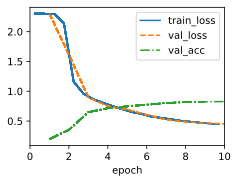

In [4]:
# use a smaller lr compared to LeNet
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

### 8.1.4. Discussion
- AlexNet’s structure bears a striking resemblance to LeNet, with a number of critical improvements, both for accuracy (dropout) and for ease of training (ReLU).
- The last 2 hidden layers of AlexNet is costly: 6400*6400 and 4096*4096 matrices
- Note that even though the number of parameters exceeds by far the amount of training data in our experiments,  there is hardly any overfitting

## 8.2. Networks Using Blocks (VGG)
Several heuristic concepts commonly used to design deep networks: from thinking in terms of individual neurons to whole layers, and now to blocks, repeating patterns of layers.  
Researchers using entire trained models to repurpose them for different, albeit related, tasks. Such large pretrained models are typically called **foundation models**.  
The idea of using blocks first emerged from the Visual Geometry Group (VGG) at Oxford University, in their eponymously-named **VGG** network 

### 8.2.1. VGG Blocks
The basic building block of CNNs is a sequence of the following: 
1. a convolutional layer with padding to maintain the resolution
2. a nonlinearity such as a ReLU
3. a pooling layer such as max-pooling to reduce the resolution. 

One of the problems with this approach is that the spatial resolution decreases quite rapidly, with a hard limit of $\log_2 d$ convolutional layers on the network before all dimensions are used up.  
Use multiple convolutions in between downsampling via max-pooling in the form of a block (Simonyan and Zisserman (2014)) to find out whether deep or wide networks perform better. Deep and narrow networks significantly outperform their shallow counterparts. Stacking 3\*3 convolutions has become a gold standard in later deep networks.  
A VGG block consists of a sequence of convolutions with 3\*3 kernels with padding of 1 (keeping height and width) followed by a 2*2 max-pooling layer with stride of 2 (halving height and width after each block). 

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
# implement a VGG block
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

### 8.2.2. VGG Network
VGG network include 2 parts: convolutional and pooling layers part, fully connected layers part. VGG consists of blocks of layers, whereas AlexNet’s layers are all designed individually.
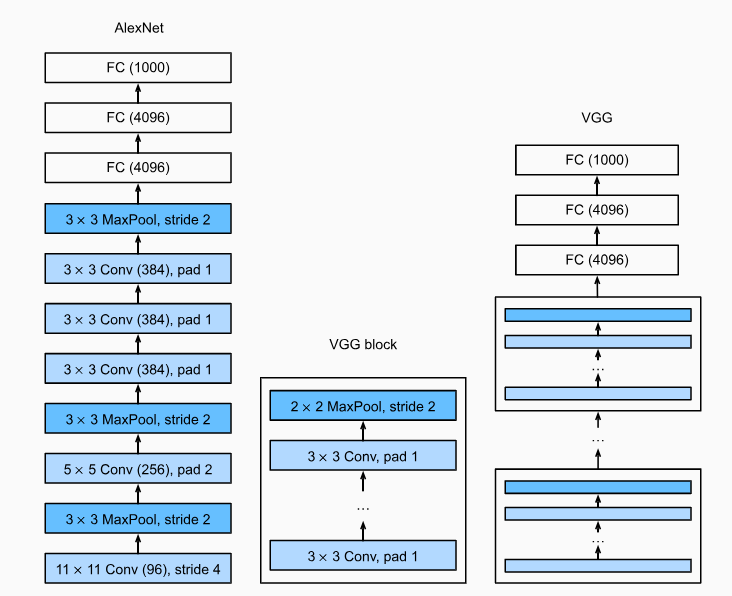  
Convolutional part of the network connects several VGG blocks in succession. ```arch``` consists of a list of tuples, one per block, each contain 2 values: # convolutional layers and # output channels.  
VGG defines a **family** of networks rather than just a specific manifestation. To build a specific network we simply iterate over ```arch``` to compose the blocks.

In [4]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

Original VGG have 5 convolutional blocks
- fist 2 have 1 convolutional layer each
- latter 3 have 2 convolutional layers each
- the first block has 64 output channels, each subsequent block doubles # output channels until 512
- use 8 convolutional layers, 3 fully connected layers, called VGG-11
- the norm to propose **families** of networks with different speed–accuracy trade-off when introducing a new architecture.

In [5]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


### 8.2.3. Training
VGG-11 is computationally more demanding than AlexNet.  
We construct a smaller number of channels network here. The training process is similay to AlexNet, with a small amount of overfitting.

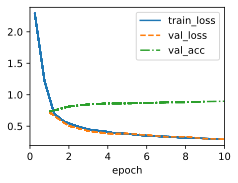

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)
# 186m24.5s

### 8.2.4. Summary
- VGG is the first truly modern convolutional neural network.
- introduced key properties such as blocks of multiple convolutions and a preference for deep and narrow networks.
- the first network that is actually an entire family of similarly parametrized models, giving the practitioner ample trade-off between complexity and speed.
- More recently ParNet (Goyal et al., 2021) demonstrated that it is possible to achieve competitive performance using a much more shallow architecture through a large number of parallel computations.

## 8.3. Network in Network (NiN)
LeNet, AlexNet, and VGG all share a common design pattern: extract features exploiting **spatial** structure via a sequence of convolutions and pooling layers and post-process the representations via fully connected layers.  
Major challenges for this design:
1. the fully connected layers at the end of the architecture consume tremendous numbers of parameters.
2. it is equally impossible to add fully connected layers earlier in the network to increase the degree of nonlinearity, which would destroy the spatial structure and require potentially even more memory.  

The **network in network (NiN)** blocks (Lin et al., 2013) offer an alternative, capable of solving both problems in one simple strategy:
- use 1*1 convolutions to add local nonlinearities across the channel activations 
- use global average pooling to integrate across all locations in the last representation layer. 
- global average pooling would not be effective, were it not for the added nonlinearities. 

### 8.3.1. NiN Blocks
The inputs and outputs of convolutional layers consist of 4d tensors (example, channel, height, width). The inputs and outputs of fully connected layers are 2d tensors (example and feature).  
NiN apply a fully connected layer at each pixel location (for each height and width). The resulting 1\*1 convolution can be thought of as a fully connected layer acting independently on each pixel location.  
differences between VGG and NiN: in block, NiN initial convolution is followed by 1\*1 convolutions with no FC layer in the end, VGG retains 3\*3 convolutions.
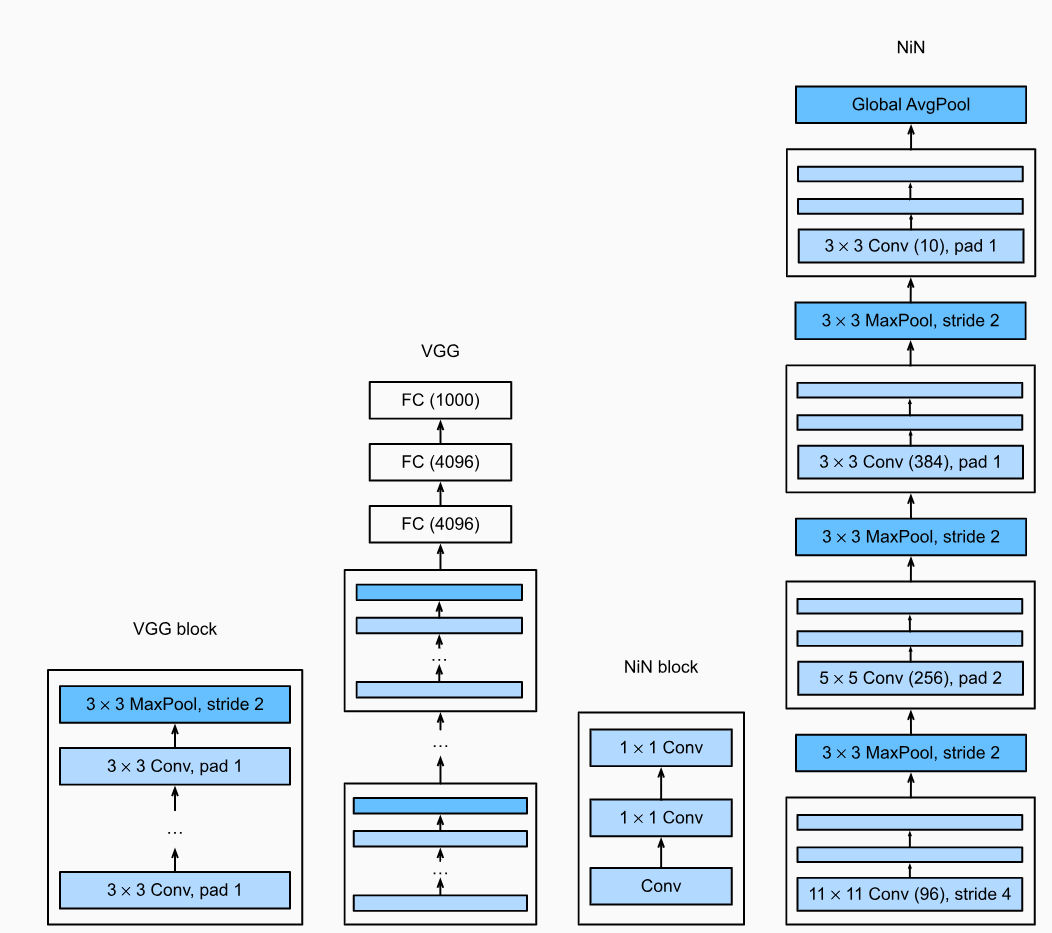


In [7]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

### 8.3.2. NiN Model
- NiN uses the same initial convolution sizes as AlexNet. Kernel size: 11*11, 5*5, 3*3
- number of output channels = AlexNet output channels number
- each NiN block is followed by a max-pooling layer with stride = 2, window shape 3*3
- NiN avoids fully connected layers altogether. Instead, NiN uses a NiN block with a number of output channels equal to the number of label classes, followed by a global average pooling layer, yielding a vector of logits. 

In [8]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [9]:
# example of output shape of each block
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


### 8.3.3. Training

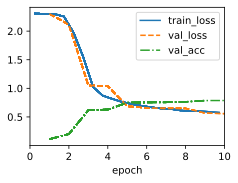

In [ ]:
# use Fashion MNIST to train the model
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)
# 181m47.3s

### 8.3.4. Summary
- NiN has dramatically fewer parameters than AlexNet and VGG. It uses global average pooling to aggregate across all image locations after the last stage of the network body. This averaging operation did not harm accuracy. 
- Choosing fewer convolutions with wide kernels and replacing them by 1*1 convolutions aids the quest for fewer parameters further.

## 8.4. Multi-Branch Networks (GoogLeNet)
**GoogLeNet** is the first network that exhibited a clear distinction among the stem (data ingest), body (data processing), and head (prediction) in a CNN.
- the **stem** is given by the first two or three convolutions that operate on the image. They extract low-level features from the underlying images. 
- the **body** follow the stem are convolutional blocks. 
- the **head** maps the features obtained so far to the required classification, segmentation, detection, or tracking problem at hand.

In [11]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

### 8.4.1. Inception Blocks
The basic convolutional block in GoogLeNet is called an **Inception block**, stemming from the meme “we need to go deeper” from the movie Inception.
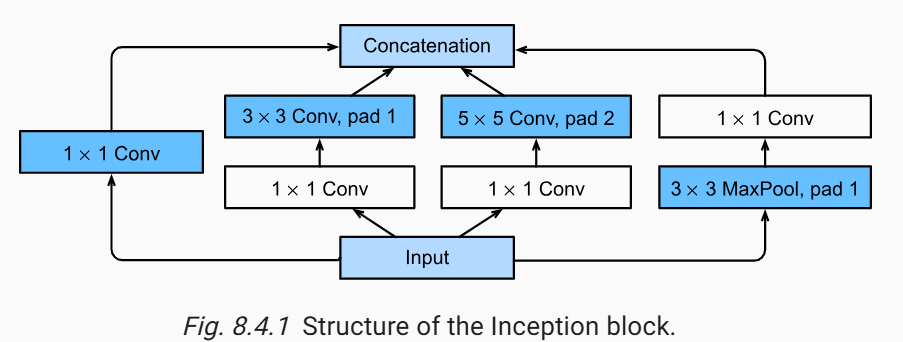
4 parallel branches:
- first 3 branches use convolutional layers with window size 1\*1, 3\*3, 5\*5 to extract information from different spatial sizes. 
- the middel 2 branches add a 1\*1 cconvolution of the input to reduce the number of channels, reducing the model’s complexity.
- the 4th branch use 3\*3 max-pooling layer followed by a 1\*1 convolutional layer to change the number of channels. All use appropriate padding to give the input and output the same height and width. 
- the output along each branch are concatenated along the cahnnel dimension and comprise the block's output.

In [12]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

### 8.4.2. GoogLeNet Model
GoogLeNet uses a stack of a total of 9 inception blocks, arranged into 3 groups with max-pooling in between, and global average pooling in its head to generate its estimates. Max-pooling between inception blocks reduces the dimensionality. At its stem, the first module is similar to AlexNet and LeNet.
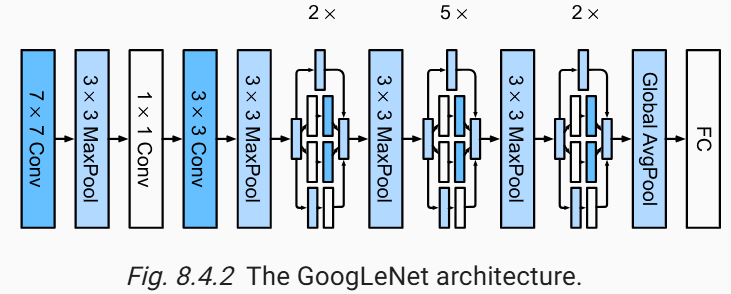

In [13]:
# stem
# 1st module use a 64 channel 7*7 convolutionl layer
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

# 2nd module use 2 convolutionl layers: a 64 channel 1*1 followed by a 3*3
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

# 3th module connect 2 complete Inception blocks in series.
# # of output of the first Inception block is 64+128+32+32=256, ratio 2:4:1:1
# # of output of the second Inception block is 128+192+96+64=480, ratio 4:6:3:2
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

# 4th module connect 5 Inception blocks in series.
# 192+208+48+64=512, 160+224+64+64=512, 128+256+64+64=512, 112+288+64+64=528, 256+320+128+128=832 for output
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

# 5th module have 2 Inception blocks with 256+320+128+128=832, 384+384+128+128=1024 outputs
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

# assemble all into a full network
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

### 8.4.3. Training


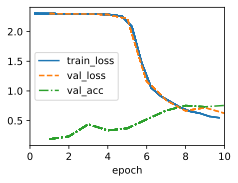

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)
# 77m18.7s

### 8.4.4. Discussion
- GoogLeNet is that it is actually **cheaper** to compute than its predecessors while simultaneously providing improved accuracy.
- the beginning of experimentation at a block level with network design hyperparameters.
- following: design choices (e.g., batch normalization, residual connections, and channel grouping) that allow us to improve networks significantly. 

## 8.5. Batch Normalization
**batch normalization**: a popular and effective technique that consistently accelerates the convergence of deep networks. Made it possible for practitioners to routinely train networks with over 100 layers.

### 8.5.1. Training Deep Networks
Preprocess data before training make difference in results. Either standardize input to mean = 0 and unit variance = 1, or rescale vectors to unit length with mean = 0 per observation.  
This standardization plays nicely with our optimizers since it puts the parameters a priori on a similar scale. Second, for a typical MLP or CNN, the variables in intermediate layers may take values with widely varying magnitudes. Third, deeper networks are complex and tend to be more liable to overfitting.   
Batch normalization: 
- In each training iteration, first normalize the inputs (of batch normalization): subtracting their mean and dividing by their standard deviation, where both are estimated based on current minibatch. 
- Next, apply a scale coefficient and an offset to recover the lost degrees of freedom.
- when applying batch normalization, the choice of batch size is even more significant than without batch normalization. Or at least, suitable calibration is needed as we might adjust batch size.  

the batch normalization is defined as: $\textrm{BN}(\mathbf{x}) = \boldsymbol{\gamma} \odot \frac{\mathbf{x} - \hat{\boldsymbol{\mu}}_\mathcal{B}}{\hat{\boldsymbol{\sigma}}_\mathcal{B}} + \boldsymbol{\beta}.$  
$\hat{\boldsymbol{\mu}}_\mathcal{B}z$ is the sample mean, $\hat{\boldsymbol{\sigma}}_\mathcal{B}$ is the sample standard deviation of the minibatch. After standardization the minibatch has mean=0 and unit variance (unit var is chosen arbitary). --> BN **center and rescales activations** using minibatch mean and variance.    
Elementwise **scale parameter** $\boldsymbol{\gamma}$ and **shift parameter** $\boldsymbol{\beta}$ that have the same shape as $\mathbf{x}$ are used for recovering the degree of freedom.  
Batch normalization actively centers and rescales the variable magnitudes back to given mean and size, so it allow for more aggressive learning rate. Calculate $\hat{\boldsymbol{\mu}}_\mathcal{B}$ and $\hat{\boldsymbol{\sigma}}_\mathcal{B}$ from: 
$$
\hat{\boldsymbol{\mu}}_\mathcal{B} = \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} \mathbf{x}
\textrm{ and }
\hat{\boldsymbol{\sigma}}_\mathcal{B}^2 = \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} (\mathbf{x} - \hat{\boldsymbol{\mu}}_{\mathcal{B}})^2 + \epsilon.
$$  
The small constant $\epsilon > 0$ is to ensure that never divide by 0. $\hat{\boldsymbol{\mu}}_\mathcal{B}$ and $\hat{\boldsymbol{\sigma}}_\mathcal{B}$ counteract the scaling issue by using noisy estimates of mean and variance --> various sources of noise in optimization often lead to faster training and less overfitting.  
For training mode, BN normalizes using minibatch statistics, injecting noise. For prediction mode, BN use dataset-level mean and variance and can give stable outputs.

### 8.5.2. Batch Normalization Layers
Batch normalization implementations for fully connected layers and convolutional layers are different: the former operates on a full minibatch at a time, we cannot ignore the batch dimension as we did before when introducing other layers.
#### 8.5.2.1. Fully Connected Layers
Inserted BN after the affine transformation and before the nonlinear activation function.  
Input of the fully connected layer: $\mathbf{x}$, the affine transformation: $\mathbf{W}\mathbf{x} + \mathbf{b}$, activation function: $\phi$, computation of a batch-normalization-enabled, fully connected layer output: $\mathbf{h} = \phi(\textrm{BN}(\mathbf{W}\mathbf{x} + \mathbf{b}) ).$ Mean and variance are computed on the same minibatch on which the transformation is applied.
### 8.5.2.2. Convolutional Layers
Apply BN after the convolution but before the nonlinear activation function.  
Apply BN on a pre-channel basis **across all locations**: we assumed that the specific location of a pattern within an image was not critical for the purpose of understanding.  
For convolutional layers, we carry out each batch normalization over the $m \cdot p \cdot q$ (minibatch example number, output height, output width) elements per output channel simultaneously.  
we collect the values over all spatial locations when computing the mean and variance and consequently apply the same mean and variance within a given channel to normalize the value at each spatial location. Each channel has its own scale and shift parameters, both of which are scalars.
#### 8.5.2.3. Layer Normalization
In the context of convolutions the batch normalization is well defined even for minibatches of size 1: **layer normalization** applied to 1 observation at a time. --> instead of normalizing across a minibatch, normalize across features within a single sample.  
For n-d vector x, layer norms are given by: $\mathbf{x} \rightarrow \textrm{LN}(\mathbf{x}) =  \frac{\mathbf{x} - \hat{\mu}}{\hat\sigma}$ where scaling and offset are applied coefficient-wise and given by: 
$$
\hat{\mu} \stackrel{\textrm{def}}{=} \frac{1}{n} \sum_{i=1}^n x_i \textrm{ and }
\hat{\sigma}^2 \stackrel{\textrm{def}}{=} \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2 + \epsilon.
$$
LN prevents divergence, the output of LN is scale independent: $\textrm{LN}(\mathbf{x}) \approx \textrm{LN}(\alpha \mathbf{x})$ for any $\alpha \neq 0$. LN also does not depend on the minibatch size and is beneficial in preventing divergence in optimization.
#### 8.5.2.4. Batch Normalization During Prediction
BN behaves differently in training mode than in prediction mode. After training, we use the entire dataset to compute stable estimates, then fix them at prediction time (like dropout).

### 8.5.3. Implementation from Scratch

In [18]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

The design pattern of the layer implementation: define the mathematics in a separate function (```batch_norm```), then integrate the functionality into a layer, whose code doing other bookkeeping matters to make the math usable in real training (device management, parameter registration, tracking running data, train/predict mode), so that mathematics can separate from boilerplate code. 

In [19]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

### 8.5.4. LeNet with Batch Normalization


In [20]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            # BN is after convolution/FC and before activation.
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

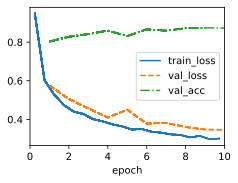

In [ ]:
# training
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)
# 3m 37.7s

In [22]:
# see the scale parameter gamma and the shift paramter beta learned from 1st batch normalization layer
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.4176, 1.7367, 1.8330, 2.3697, 1.4153, 1.7134],
        grad_fn=<ViewBackward0>),
 tensor([-0.1693, -0.9098,  1.4511,  1.2155, -0.9482, -1.9495],
        grad_fn=<ViewBackward0>))

### 8.5.5. Concise Implementation
Use ```BatchNorm``` class in deep learning framework.

In [23]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

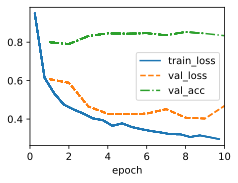

In [ ]:
# training. APIs is faster as its complied to C++ or CUDA
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)
# 3m35.1s

### 8.5.6. Discussion
- BN can reduce **internal covariate shift**: the distribution of variable values changes over the course of training. Why precisely this technique works an open question wanting for a rigorous explanation. 
- BN has proven an indispensable method, applied in nearly all deployed image classifiers.
- During model training, BN continuously adjusts the intermediate output of the network by utilizing the mean and standard deviation of the minibatch, so that the values of the intermediate output in each layer throughout the neural network are more stable.
- BN is slightly different for fully connected layers than for convolutional layers. In fact, for convolutional layers, layer normalization can sometimes be used as an alternative.
- Like a dropout layer, BN layers have different behaviors in training mode than in prediction mode.
- BN is useful for regularization and improving convergence in optimization.
- For more robust models that are less sensitive to input perturbations, consider removing BN

## 8.6. Residual Networks (ResNet) and ResNeXt
### 8.6.1. Function Classes
$\mathcal{F}$: the class of functions that a specific network architecture (together with learning rates and other hyperparameter settings) can reach. For all $f \in \mathcal{F}$ there exists some set of parameters that can be obtained through training on a suitable dataset. We try to find the true function $f^*$ by solving the optimization problem: 
$$
f^*_\mathcal{F} \stackrel{\textrm{def}}{=} \mathop{\mathrm{argmin}}_f L(\mathbf{X}, \mathbf{y}, f) \textrm{ subject to } f \in \mathcal{F}.
$$
Regularization may control complexity and achieve consistency, so a larger size of training data generally leads to better $f^*$.  
Assume that $\mathcal{F}'$ can have a better outcome and $f^*_{\mathcal{F}'}$ is better than $f^*_{\mathcal{F}}$, however if $\mathcal{F} \not\subseteq \mathcal{F}'$ there is no guarantee that this should happen. Compared with non-nested function classes, nested function classes can guarantee that increase them can increase the power of the network.  
**Residual network (ResNet)** is the idea that every additional layer should more easily contain the identity function as one of its elements.

### 8.6.2. Residual Blocks
- Input: $\mathbf{x}$  
- Underlying mapping we want: $f(\mathbf{x})$  
- Left: directly learn $f(\mathbf{x})$  
- Right: learn the **residual mapping** $g(\mathbf{x}) = f(\mathbf{x}) - \mathbf{x}$   

If the identity mapping $f(\mathbf{x}) = \mathbf{x}$ is the desired underlying mapping, the residual mapping amounts to $g(\mathbf{x}) = 0$ and is easier to learn: only need to push the weights and biases of the upper weight layer within the box to 0.  
The right figure is the **residual block** of ResNet, the solid line carry the input to the addition operator **residual connection / shortcut connection**, where input can forward propagate faster through the residual connections across layers.  
The residual block can be thought of as a special case of the multi-branch Inception block: it has two branches one of which is the identity mapping.
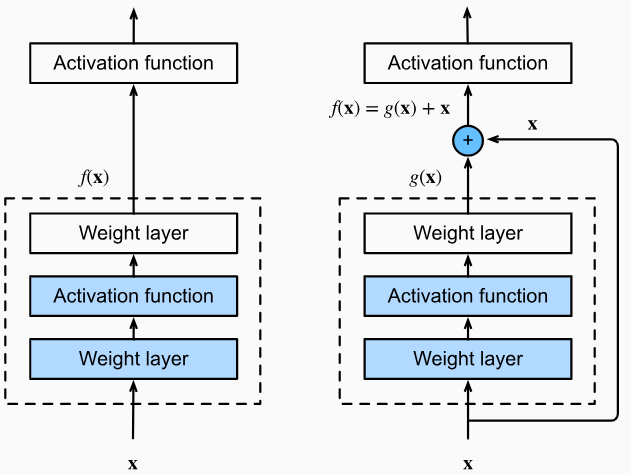


ResNet design:
- two 3*3 convolutional layer
- Each convolutional layer is followed by a batch normalization layer and a ReLU activation function
- skip convolution operations, add the input directly before the final ReLU activation function
- requires the output of the two convolutional layers is the same shape as the input to add them together
- to change #channels, use a 1\*1 convolutional layer to transform the input into desired shape.

In [25]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [26]:
class Residual(nn.Module):  #@save
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

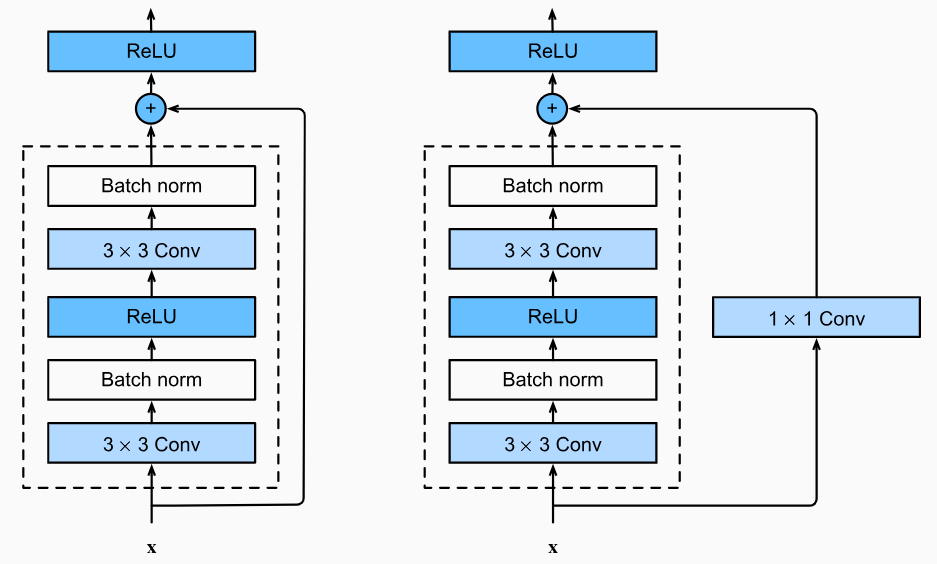
The code generates 2 type: use ```use_1x1conv=False``` to add the input to the output before applying ReLU

In [27]:
# when input & output are same shape and no need 1*1 convolution
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [28]:
# halve the output height & width 
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

### 8.6.3. ResNet Model
The first two layers of ResNet are the same as those of the GoogLeNet: 7\*7 convolutional layer with 64 output channels and a stride of 2 is followed by the 3\*3 max-pooling layer with a stride of 2. Difference is BN layer added after each convolutional layer.

In [29]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

ResNet uses 4 modules made up of residual blocks, each of which uses several residual blocks with the same number of output channels.  
The number of channels in the first module is the same as the number of input channels.   
In the first residual block for each of the subsequent modules, the number of channels is doubled compared with that of the previous module, and the height and width are halved.

In [30]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

Add all the modules to ResNet. 2 residual blocks are used for each module. Add a global average pooling layer, followed by the fully connected layer output like GoogLeNet.

In [31]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

ResNet-18: 18 layers in total.
- 4 convolutional layers in each module exclude the 1*1 one
- first 7*7 convolutional layer
- final fully connected layer
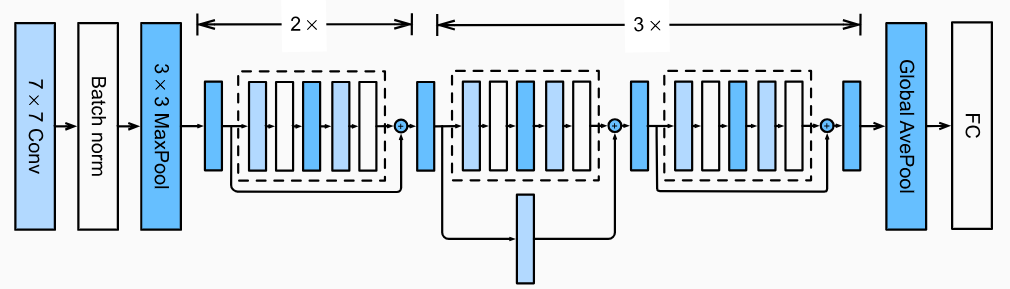

In [32]:
# shape across different modules in ResNet
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


### 8.6.4. Training
A gap is between training & validation loss. More training data will offer benefit in closing the gap.

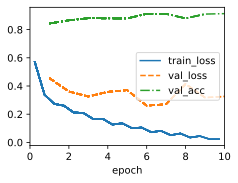

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)
# 535m51.6s

### 8.6.5. ResNeXt
Trade-off between nonlinearity and dimensionality for a block: we could add more nonlinearity by increasing the number of layers, or by increasing the width of the convolutions, or increase the number of channels that can carry information between blocks.  
Applying the idea of multiple independent groups to the ResNet block led to the design of ResNeXt, which adopts the same transformation in all branches, thus minimizing the need for manual tuning of each branch.
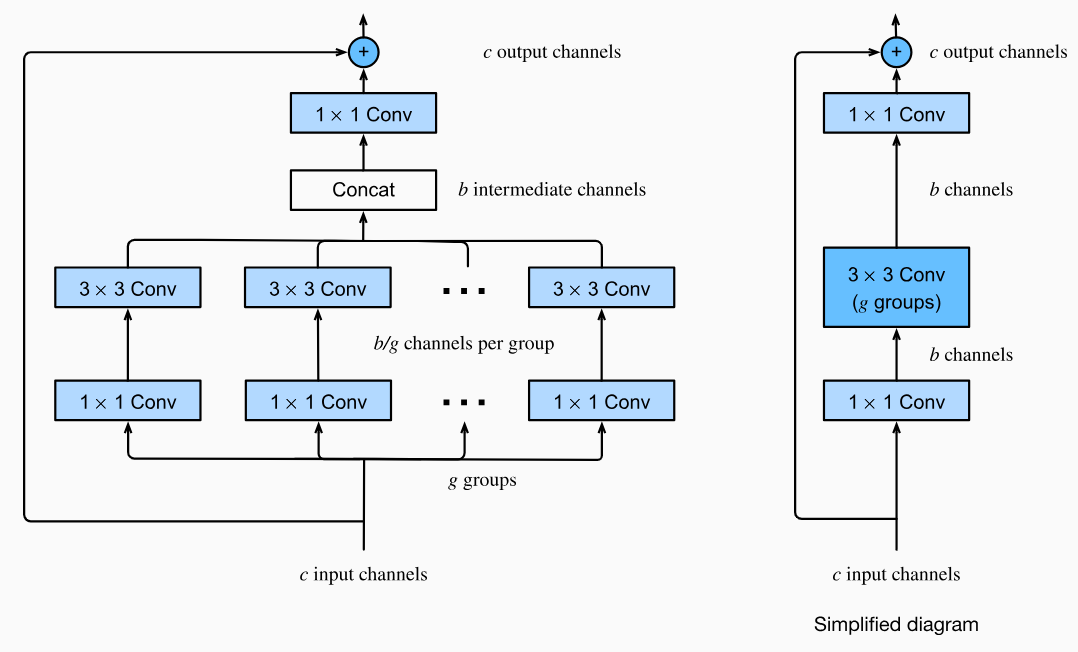
**grouped convolution**: $g$ groups of size $c_i/g$ generate $g$ outputs of size $c_o/g$. Cost is reduced from $\mathcal{O}(c_\textrm{i} \cdot c_\textrm{o})$ to $\mathcal{O}(g \cdot (c_\textrm{i}/g) \cdot (c_\textrm{o}/g)) = \mathcal{O}(c_\textrm{i} \cdot c_\textrm{o} / g)$, $g$ times faster. The number of parameters needed also reduce $g$ times.  
Challenge is no info is exchanged between the $g$ groups. 2 ways to solve: 1\*1 conv (mix info across channels) --> 3\*3 grouped conv --> 1\*1 conv (mix groups again)

In [34]:
class ResNeXtBlock(nn.Module):  #@save
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
# can add use_1x1conv=True and strides to change the output shape
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

### 8.6.6. Summary and Discussion
- Nested function classes are desirable since they allow us to obtain strictly more powerful rather than also subtly different function classes when adding capacity. 
- The residual mapping can learn the identity function more easily, such as pushing parameters in the weight layer to zero. We can train an effective **deep** neural network by having residual blocks.
- ResNeXt is an example for how the design of convolutional neural networks has evolved over time: by being more frugal with computation and trading it off against the size of the activations (number of channels), it allows for faster and more accurate networks at lower cost. 


## 8.7. Densely Connected Networks (DenseNet)
**DenseNet** (dense convolutional network) is characterized by both the connectivity pattern where each layer connects to all the preceding layers and the concatenation operation (rather than the addition operator in ResNet) to preserve and reuse features from earlier layers.
### 8.7.1. From ResNet to DenseNet
Taylor expaansion for functions when $x = 0$ is:
$$
f(x) = f(0) + x \cdot \left[f'(0) + x \cdot \left[\frac{f''(0)}{2!}  + x \cdot \left[\frac{f'''(0)}{3!}  + \cdots \right]\right]\right].
$$
ResNet decomposes functions into $f(\mathbf{x}) = \mathbf{x} + g(\mathbf{x})$, a linear term and a complex nonlinear term. Use addition  
DenseNet use **concatenation** to capture info beyond 2 terms: $\mathbf{x} \to \left[
\mathbf{x},f_1(\mathbf{x}),f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right), f_3\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right), f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right)\right]\right), \ldots\right].$ Combine all functions to reduce the number of features.  
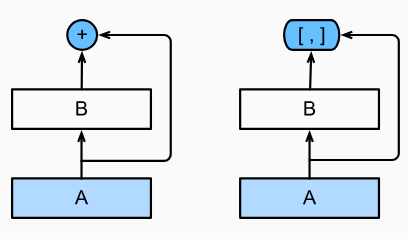  
**Dense blocks**: define how the inputs and outputs are concatenated. **transition layers**: control the number of channels so that it is not too large.

### 8.7.2. Dense Blocks
DenseNet uses the modified “batch normalization, activation, and convolution” structure of ResNet.  
A **dense block** consists of multiple convolution blocks, each using the same number of output channels. We concatenate the input and output of each convolution block on the channel dimension in the forward propagation.

In [36]:
import torch
from torch import nn
from d2l import torch as d2l

In [38]:
# convolution block structure
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

# dense block
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [39]:
# example: dense block with 2 conv blocks of 10 output channels.
# with input channel = 3, output = 3+10+10 = 23 channels
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

### 8.7.3. Transition Layers
**Dense block** will increase the number of channels. A **transition layer** is used to control the complexity of the model. It reduces the number of channels by using a 1\*1 convolution and halves the height & width via avg pooling with stride = 2.

In [40]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [41]:
#  reduce previous example output to 10, halve height & width
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

### 8.7.4. DenseNet Model

In [42]:
#  use 1 conv layer and max-pooling like ResNet
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
    
# 4 dense blocks
# set conv layer number to 4, number of channels (growth rate) to 32
# total 128 channels added to each dense block
# use transition layer to halve height & width & number of channels.
# a global pooling and a FC layer at the end
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)


### 8.7.5. Training
reduce the input height and width from 224 to 96 to simplify the computation.

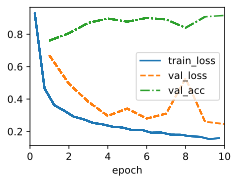

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)
# 48m47.8s

### 8.7.6. Summary and Discussion
- The main components that comprise DenseNet are dense blocks and transition layers.
- For transition layers, we need to keep the dimensionality under control when composing the network by adding transition layers that shrink the number of channels again.
- DenseNet concatenates inputs and outputs on the channel dimension, which lead to heavy GPU memory consumption, and need more memory efficient implementations that may increase training time

### 8.8. Designing Convolution Network Architectures
- AlexNet: Demonstrated the power of deep CNNs on ImageNet.
- VGG: repeated 3\*3 conv, 
- NiN: 1\*1 conv to add local nonlinear transformations, use global aggregation to replace FC
- GoogLeNet: multi-branch architecture
- ResNet: residual connections
- ResNeXt: grouped convolutions
- SENet Squeeze and Excitation Networks: channel-wise global attention 

We have omitted networks obtained via **neural architecture search** (NAS): Given a fixed search space, NAS uses a search strategy to automatically select an architecture based on the returned performance estimation. The outcome of NAS is a single network instance.  
**Design network design spaces**: combines the strength of manual design and NAS. It accomplishes this by operating on **distributions of networks** and optimizing the distributions in a way to obtain good performance for entire families of networks (**RegNets**, RegNetX, RegNetY). 


### 8.8.1. The AnyNet Design Space
networks consist of a **stem**: performs initial image processing through conv with a larger window size, a **body**: consists of multiple blocks, carrying out the bulk of the transformations needed to go from raw images to object representations, and a **head**: converts result into the desired outputs, such as via a softmax regressor for multiclass classification.  
The body consists of multiple stages, operating on the image at decreasing resolutions.  
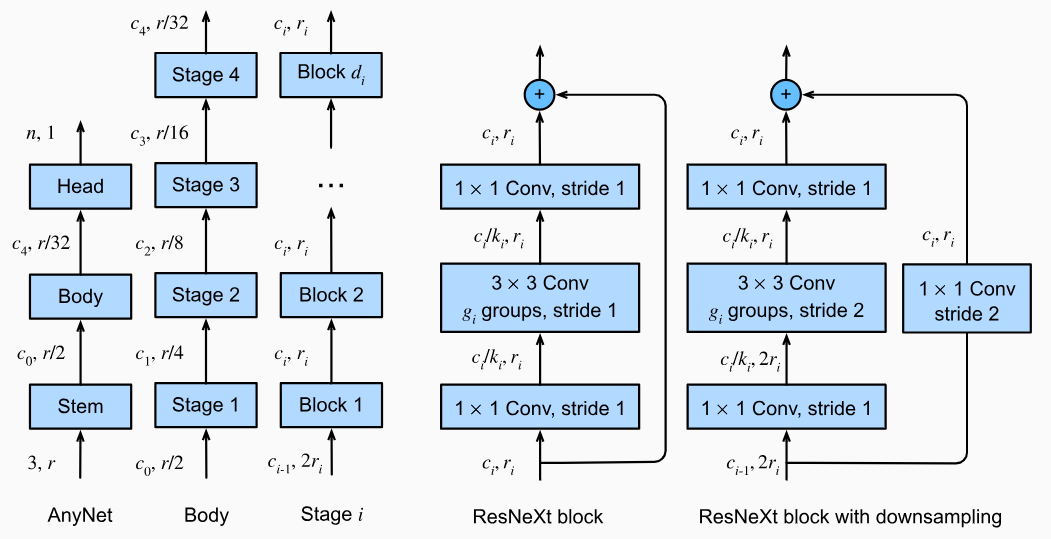  
Stem: input 3 channels, use 3\*3 conv with stride=2, followed by a batch norm to halve the resolution, generate $c_o$ as input to body.  
Body reduce 224\*224\*3 to 7\*7\*$c_4$ through 4 stages, each with an eventual stride=2.  
Head: global average pooling followed by a FC layer, emit n-d vector for n classes.  
Each stage: 
- contains several ResNeXt blocks, begin with stride=2 block to halve the spatial resolution, the residual branch adjust by adding 1\*1 conv. 
- Inside each block, reduce channels temorarily $c_i$ --> $c_i/k_i$ where $k_i$ is the bottleneck ratio to reduce computation, but may not help much. 
- decide number of groups $g_i$, controls **cardinality** for more parallel transformations.
- parameters available: block width (number of channels) $c_0, \ldots c_4$, depth per stage (number of blocks) $d_1, \ldots d_4$, bottleneck ratios $k_1, \ldots k_4$, group widths (number of groups) $g_1, \ldots g_4$, total 17 parameters.

In [44]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [47]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())
    
# statge consist of depth blocks, num_channels is the block width
# the first one halve the height & width
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

# put stem, body, head together
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

### 8.8.2. Distributions and Parameters of Design Spaces
To find the best paramters for the 17 parameters, brute-force is impossible. Try to find rules about good networks.  
4 assumptions:
1. many good networks exist.
2. early training is enough to judge quality, no need for fully train for each, train for a few epochs and use intermediate accuracy: **multi-fidelity optimization**
3. small models predict large model behavior
4. parameters can be factorized, their influence are independent.

**Sample uniformly** then evaluate performance. Use evaluate the quality of the choice of parameters by reviewing the **distribution** of error/accuracy.  
Denote by $F(e)$ the **cumulative distribution function (CDF)** for errors committed by networks of a given design space, drawn using probability disribution $p$: $F(e, p) \stackrel{\textrm{def}}{=} P_{\textrm{net} \sim p} \{e(\textrm{net}) \leq e\}.$  
Find a distribution $p$ over networks such that most networks have a low error rate. Resort from empirical CDF $\hat{F}(e, \mathcal{Z})$: $\hat{F}(e, \mathcal{Z}) = \frac{1}{n}\sum_{i=1}^n \mathbf{1}(e_i \leq e).$  
Whenever the CDF for one set of choices majorizes (or matches) another CDF it follows that its choice of parameters is superior (or indifferent)

### 8.8.3. RegNet
design space consists of simple networks following easy-to-interpret design principles:
- Share the bottleneck ratio $k_i = k$ for all stages
- Share the group width $g_i = g$ for all stages 
- Increase network width & depth across stages
- best choice: the width of the network ideally increases linearly with the block index across the network $c_j \approx c_0 + c_a j$, k=1, no bottlenecks.

In [48]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)
        

In [49]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


### 8.8.4. Training


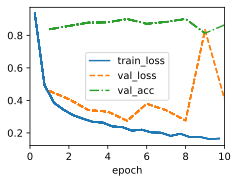

In [ ]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)
# 52m54.6s

### 8.8.5. Discussion
With desirable inductive biases (assumptions or preferences) like locality and translation invariance (Section 7.1) for vision, CNNs have been the dominant architectures in this area, until Transformers (Section 11.7) (Dosovitskiy et al., 2021, Touvron et al., 2021) started surpassing CNNs in terms of accuracy. 
